In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

In [ ]:
# code from https://blog.bogatron.net/blog/2014/02/02/visualizing-dirichlet-distributions/

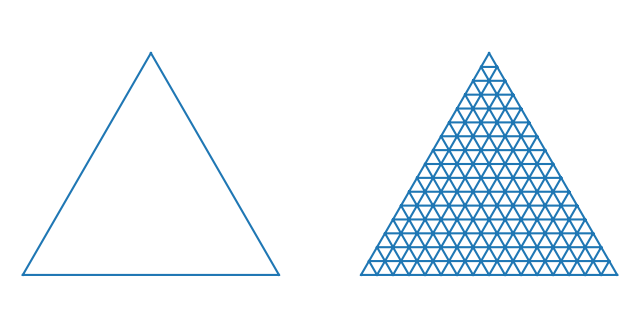

In [3]:
corners = np.array([[0, 0], [1, 0], [0.5, 0.75**0.5]])
AREA = 0.5 * 1 * 0.75**0.5
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

plt.figure(figsize=(8, 4))
for (i, mesh) in enumerate((triangle, trimesh)):
    plt.subplot(1, 2, i+ 1)
    plt.triplot(mesh)
    plt.axis('off')
    plt.axis('equal')

In [34]:
# For each corner of the triangle, the pair of other corners
pairs = [corners[np.roll(range(3), -i)[1:]] for i in range(3)]
# The area of the triangle formed by point xy and another pair or points
tri_area = lambda xy, pair: 0.5 * np.linalg.norm(np.cross(*(pair - xy)))

def xy2bc(xy, tol=1.e-4):
    '''Converts 2D Cartesian coordinates to barycentric.'''
    coords = np.array([tri_area(xy, p) for p in pairs]) / AREA
    return np.clip(coords, tol, 1.0 - tol)

In [35]:
class Dirichlet(object):
    def __init__(self, alpha):
        from math import gamma
        from operator import mul
        self._alpha = np.array(alpha)
        self._coef = gamma(np.sum(self._alpha)) / \
                           np.multiply.reduce([gamma(a) for a in self._alpha])
    def pdf(self, x):
        '''Returns pdf value for `x`.'''
        from operator import mul
        return self._coef * np.multiply.reduce([xx ** (aa - 1)
                                               for (xx, aa)in zip(x, self._alpha)])

In [36]:
def draw_pdf_contours(dist, nlevels=200, subdiv=8, **kwargs):
    import math

    refiner = tri.UniformTriRefiner(triangle)
    trimesh = refiner.refine_triangulation(subdiv=subdiv)
    pvals = [dist.pdf(xy2bc(xy)) for xy in zip(trimesh.x, trimesh.y)]

    plt.tricontourf(trimesh, pvals, nlevels, cmap='jet', **kwargs)
    plt.axis('equal')
    plt.xlim(0, 1)
    plt.ylim(0, 0.75**0.5)
    plt.axis('off')

1.0


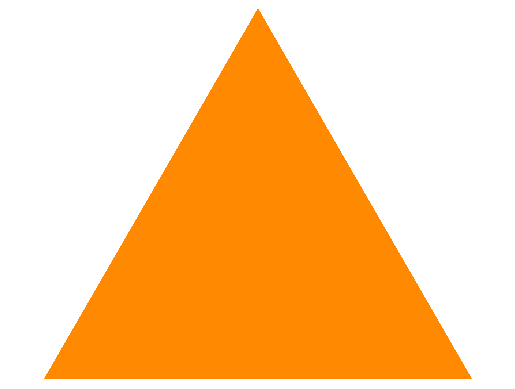

In [26]:

alpha = 3*(1/3)
print(alpha)
draw_pdf_contours(Dirichlet([alpha, alpha,alpha]))


0.9333333333333332


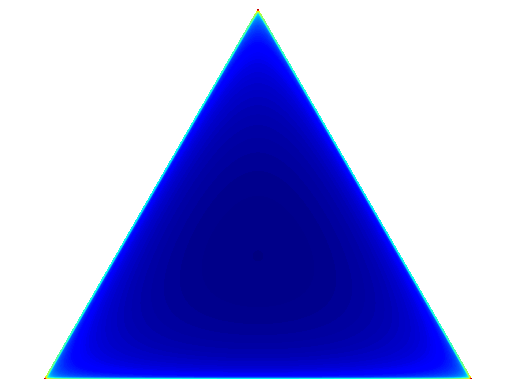

In [30]:

alpha = 2.8*(1/3)
print(alpha)
draw_pdf_contours(Dirichlet([alpha, alpha,alpha]))


2.0


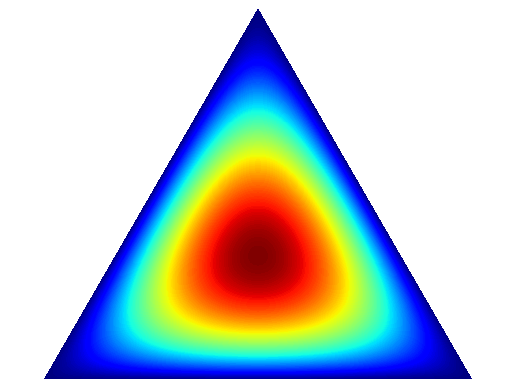

In [28]:

alpha = 6*(1/3)
print(alpha)
draw_pdf_contours(Dirichlet([alpha, alpha,alpha]))


5.0


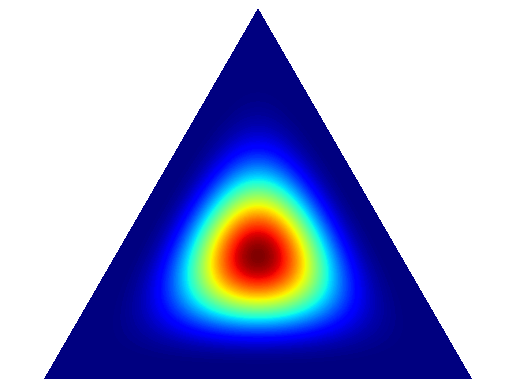

In [29]:

alpha = 15*(1/3)
print(alpha)
draw_pdf_contours(Dirichlet([alpha, alpha,alpha]))


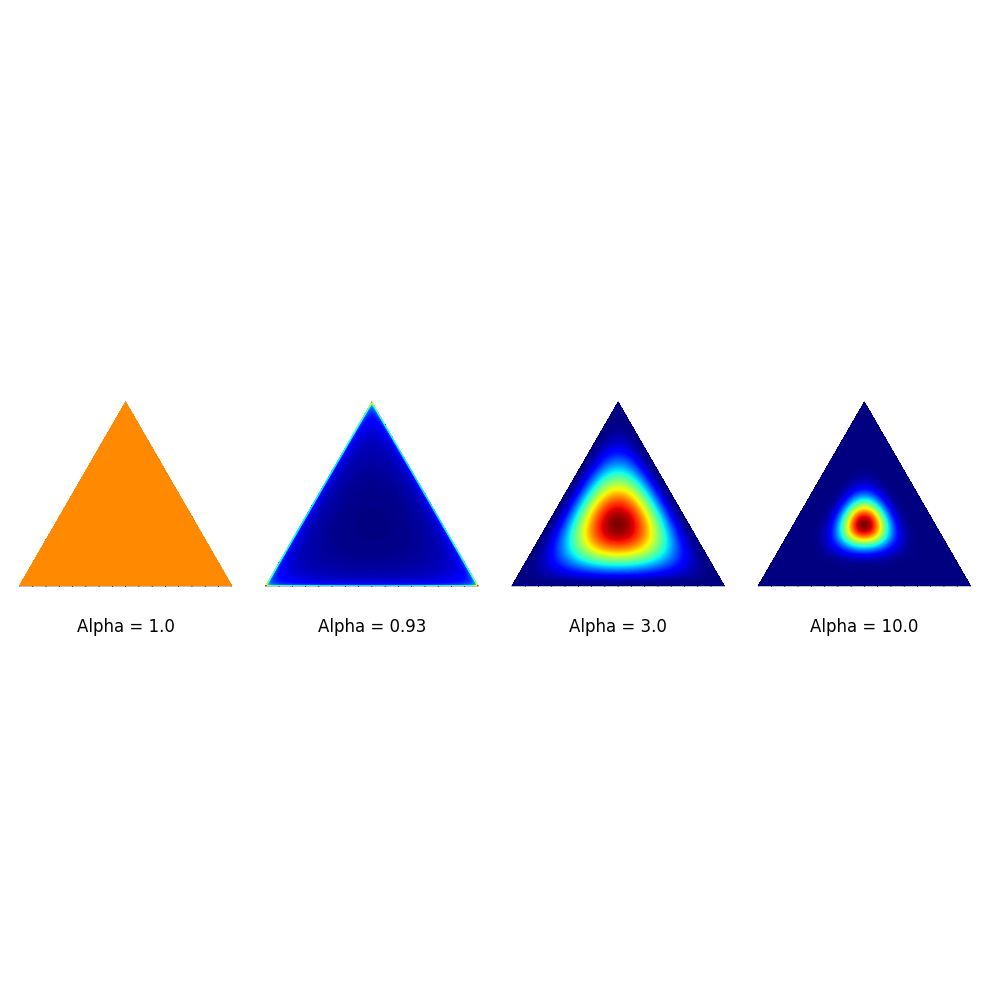

In [66]:
# Crear una figura y subplots
fig, axs = plt.subplots(1, 4, figsize=(10, 10))

# Definir los parámetros para la primera distribución
alpha1 = 3*(1/3)
dist1 = Dirichlet([alpha1, alpha1, alpha1])

# Dibujar el primer gráfico en el primer subplot
axs[0].triplot(trimesh, color='black', linewidth=0.5)
draw_pdf_contours(dist1, ax=axs[0])
axs[0].set_title("Alpha = "+str(alpha1), y=0.35)

# Definir los parámetros para la segunda distribución
alpha2 = round(2.8*(1/3), 2)
dist2 = Dirichlet([alpha2, alpha2, alpha2])

# Dibujar el segundo gráfico en el segundo subplot
axs[1].triplot(trimesh, color='black', linewidth=0.5)
draw_pdf_contours(dist2, ax=axs[1])
axs[1].set_title("Alpha = "+str(alpha2), y=0.35)

# Definir los parámetros para la tercera distribución
alpha3 = 9*(1/3)
dist3 = Dirichlet([alpha3, alpha3, alpha3])

# Dibujar el tercer gráfico en el tercer subplot
axs[2].triplot(trimesh, color='black', linewidth=0.5)
draw_pdf_contours(dist3, ax=axs[2])
axs[2].set_title("Alpha = "+str(alpha3), y=0.35)

# Definir los parámetros para la cuarta distribución
alpha4 = 30*(1/3)
dist4 = Dirichlet([alpha4, alpha4, alpha4])

# Dibujar el cuarto gráfico en el cuarto subplot
axs[3].triplot(trimesh, color='black', linewidth=0.5)
draw_pdf_contours(dist4, ax=axs[3])
axs[3].set_title("Alpha = "+str(alpha4), y=0.35)

# Ajustar los límites y las etiquetas de los ejes
for ax in axs.flat:
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 0.75**0.5)
    ax.set_aspect('equal')
    ax.axis('off')

# Ajustar los márgenes entre los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()
